# DES Weak Lensing dataset 1 year: cutting off nonlinear data

This is the notebook used to test the DES cutoff code.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
invcov = np.loadtxt('./data/DES_inv_cov.dat')

In [4]:
dat = np.loadtxt('./data/DES_vec_data.dat')

In [5]:
dl = np.loadtxt('./data/DES_theory_vec_linear.dat')

In [6]:
dnl = np.loadtxt('./data/DES_theory_vec_nonlinear.dat')

In [7]:
DL = dl - dat

In [8]:
DNL = dnl - dat

In [9]:
print('NL like:',DNL.T @ invcov @ DNL)

NL like: 519.080726272


In [10]:
print('L like:', DL.T @invcov @ DL)

L like: 564.77676901


In [11]:
delta_chi2 = np.abs(DNL.T @ invcov @ DNL - DL.T @invcov @ DL)

In [12]:
delta_chi2

45.696042737650714

In [13]:
def remove_data(threshold, data, tnl, tl, invcov, method = 1):

    if method == 1:
        # copyt the data
        DNL_new = tnl.copy() - data.copy()
        DL_new = tl.copy() - data.copy()
        delta_chi2 = np.abs(DNL_new.T @ invcov @ DNL_new - DL_new.T @invcov @ DL_new)
    elif method == 2:
        DNL_new = tnl.copy() 
        DL_new = tl.copy()
        delta_chi2 = np.abs(DNL_new.T @ invcov @ DNL_new - DL_new.T @invcov @ DL_new)
    elif method == 3:
        D = tnl - tl
        #delta_chi2 = D.T @invcov @ D
        delta_chi2 = np.matmul(D.T, np.matmul(invcov, D))
        
    print('inital delta_chi2:', delta_chi2)
    delta_chi2_now = delta_chi2
    ind_to_remove = []
    chi2_evol = []
    chi2_evol.append(delta_chi2_now)
    k=0
    while(delta_chi2_now > threshold and k <  data.shape[0]+1):
        #print(k)
        contr = []
        for i in range(data.shape[0]):
            if (method == 1 or method == 2):
                DNL_trial = DNL_new.copy()
                DL_trial = DL_new.copy()
                DNL_trial[i] = 0.0
                DL_trial[i] =  0.0
                delta_chi2_i = np.abs(DNL_trial.T @ invcov @ DNL_trial - DL_trial.T @ invcov @ DL_trial)
                contr.append(np.abs(delta_chi2_i-delta_chi2_now))
            
            elif method == 3:
                D_trial = D.copy()
                D_trial[i] = 0.0

                delta_chi2_i = D_trial.T @ invcov @ D_trial
                #delta_chi2_i = np.matmul(D_trial.T, np.matmul(invcov, D_trial))
                #if (delta_chi2_i-delta_chi2_now < 0 ):
                contr.append(np.abs(delta_chi2_i-delta_chi2_now))
            
        j = contr.index(np.max(contr))
                
        ind_to_remove.append(j)
        #print('ind_to_rem',j)
        
        if (method == 1 or method == 2):
            DNL_new[j] = 0.0
            DL_new[j]  = 0.0
            delta_chi2_now = np.abs(DNL_new.T @ invcov @ DNL_new - DL_new.T @ invcov @ DL_new)  
        elif( method == 3):
            D[j] = 0.0
            delta_chi2_now = np.abs(D.T @ invcov @D)
            #delta_chi2_now = np.matmul(D.T, np.matmul(invcov,D))
            
        chi2_evol.append(delta_chi2_now)
        #print('delta_chi2_now:', delta_chi2_now)
        k+=1
        
    return ind_to_remove, chi2_evol

In [14]:
threshold = 1.0
remove_index, chi2_steps = remove_data(threshold=threshold, data=dat,invcov=invcov, tnl=dnl,tl=dl,method=3 )

inital delta_chi2: 57.1514089906


plotting progressive $\Delta \chi^2$

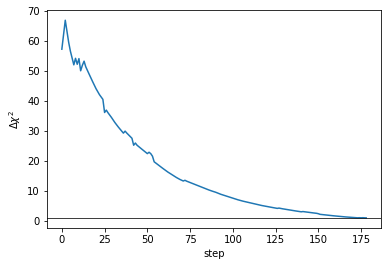

In [15]:
plt.plot(range(len(chi2_steps)), chi2_steps)
plt.ylabel(r'$\Delta \chi^2$')
plt.xlabel('step')
plt.axhline(threshold, color = 'black', linestyle = '-', linewidth = 0.75)
plt.show()

In [16]:
len(remove_index)

178

In [17]:
len(dnl)-len(remove_index)

279

In [18]:
used_items = np.loadtxt('./data/DES_used_items.dat')

In [19]:
used_items[:15,3]

array([  6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,
        17.,  18.,  19.,  20.])

In [20]:
used_items.shape

(457, 4)

In [21]:
np.where((used_items[:,0] == 1.0) & (used_items[:,1] == 1.0) & (used_items[:,2] == 1))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),)

In [22]:
to_use_items = np.delete(used_items, remove_index, axis = 0)

In [23]:
to_use_items

array([[  1.,   1.,   1.,  11.],
       [  1.,   1.,   1.,  12.],
       [  1.,   1.,   1.,  13.],
       ..., 
       [  4.,   5.,   5.,  18.],
       [  4.,   5.,   5.,  19.],
       [  4.,   5.,   5.,  20.]])

In [24]:
to_use_items.shape

(279, 4)

In [25]:
xip = to_use_items[ np.where((to_use_items[:,0] == 1.0))]

In [26]:
xip.shape

(105, 4)

In [27]:
xip

array([[  1.,   1.,   1.,  11.],
       [  1.,   1.,   1.,  12.],
       [  1.,   1.,   1.,  13.],
       [  1.,   1.,   1.,  14.],
       [  1.,   1.,   1.,  15.],
       [  1.,   1.,   1.,  16.],
       [  1.,   1.,   1.,  17.],
       [  1.,   1.,   1.,  18.],
       [  1.,   1.,   1.,  19.],
       [  1.,   1.,   1.,  20.],
       [  1.,   1.,   2.,  11.],
       [  1.,   1.,   2.,  12.],
       [  1.,   1.,   2.,  13.],
       [  1.,   1.,   2.,  14.],
       [  1.,   1.,   2.,  15.],
       [  1.,   1.,   2.,  16.],
       [  1.,   1.,   2.,  17.],
       [  1.,   1.,   2.,  18.],
       [  1.,   1.,   2.,  19.],
       [  1.,   1.,   2.,  20.],
       [  1.,   1.,   3.,  12.],
       [  1.,   1.,   3.,  13.],
       [  1.,   1.,   3.,  14.],
       [  1.,   1.,   3.,  15.],
       [  1.,   1.,   3.,  16.],
       [  1.,   1.,   3.,  17.],
       [  1.,   1.,   3.,  18.],
       [  1.,   1.,   3.,  19.],
       [  1.,   1.,   3.,  20.],
       [  1.,   1.,   4.,  11.],
       [  

In [28]:
xim = to_use_items[ np.where((to_use_items[:,0] == 2.0))]

In [29]:
xim.shape

(1, 4)

In [30]:
xim

array([[  2.,   4.,   4.,  20.]])

In [31]:
gammat = to_use_items[ np.where((to_use_items[:,0] == 3.0))]

In [32]:
gammat.shape

(149, 4)

In [33]:
wtheta = to_use_items[ np.where((to_use_items[:,0] == 4.0))]

In [34]:
wtheta.shape

(24, 4)

In [37]:
thetas = np.loadtxt('./data/DES_1YR_final_theta_bins.dat')
thetas

array([   2.82892205,    3.56145195,    4.48383125,    5.64515088,
          7.10700175,    8.94802743,   11.26359312,   14.18012136,
         17.85303226,   22.47319161,   28.29405514,   35.61746915,
         44.8381916 ,   56.44731998,   71.05929607,   89.45541049,
        112.61560585,  141.76374877,  178.46262927,  224.64388959])

In [38]:
for i in range(xip.shape[0]):
    xip[i,3] = thetas[int(xip[i,3])-1]

In [39]:
xip

array([[   1.        ,    1.        ,    1.        ,   28.29405514],
       [   1.        ,    1.        ,    1.        ,   35.61746915],
       [   1.        ,    1.        ,    1.        ,   44.8381916 ],
       [   1.        ,    1.        ,    1.        ,   56.44731998],
       [   1.        ,    1.        ,    1.        ,   71.05929607],
       [   1.        ,    1.        ,    1.        ,   89.45541049],
       [   1.        ,    1.        ,    1.        ,  112.61560585],
       [   1.        ,    1.        ,    1.        ,  141.76374877],
       [   1.        ,    1.        ,    1.        ,  178.46262927],
       [   1.        ,    1.        ,    1.        ,  224.64388959],
       [   1.        ,    1.        ,    2.        ,   28.29405514],
       [   1.        ,    1.        ,    2.        ,   35.61746915],
       [   1.        ,    1.        ,    2.        ,   44.8381916 ],
       [   1.        ,    1.        ,    2.        ,   56.44731998],
       [   1.        ,    1.      

In [40]:
print('XIP:')
for i in range(1,5):
    for j in range(1,5):
        #print(i,j)
        xip_this = xip[np.where((xip[:,1] == i) &  (xip[:,2] == j)) ]
        if xip_this.shape[0] > 0:
            theta_max = xip_this[:,3].max()
            theta_min = xip_this[:,3].min()
            print('xip  ',i,j,np.floor(theta_min), np.ceil(theta_max))
        

XIP:
xip   1 1 28.0 225.0
xip   1 2 28.0 225.0
xip   1 3 35.0 225.0
xip   1 4 28.0 225.0
xip   2 2 22.0 225.0
xip   2 3 28.0 225.0
xip   2 4 22.0 225.0
xip   3 3 22.0 225.0
xip   3 4 22.0 225.0
xip   4 4 17.0 225.0


In [41]:
for i in range(xim.shape[0]):
    xim[i,3] = thetas[int(xim[i,3])-1]

In [42]:
print('XIM:')
for i in range(1,5):
    for j in range(1,5):
        #print(i,j)
        xim_this = xim[np.where((xim[:,1] == i) &  (xim[:,2] == j)) ]
        if xim_this.shape[0]>0:
            theta_max = xim_this[:,3].max()
            theta_min = xim_this[:,3].min()
            print('xim  ',i,j,np.floor(theta_min), np.ceil(theta_max))

XIM:
xim   4 4 224.0 225.0


In [43]:
for i in range(gammat.shape[0]):
    gammat[i,3] = thetas[int(gammat[i,3])-1]

In [44]:
print('gamma t:')
for i in range(1,5):
    for j in range(1,5):
        #print(i,j)
        gammat_this = gammat[np.where((gammat[:,1] == i) &  (gammat[:,2] == j)) ]
        if gammat_this.shape[0]>0:
            theta_max = gammat_this[:,3].max()
            theta_min = gammat_this[:,3].min()
            print('gammat  ',i,j,np.floor(theta_min), np.ceil(theta_max))

gamma t:
gammat   1 1 112.0 225.0
gammat   1 2 112.0 225.0
gammat   1 3 141.0 179.0
gammat   1 4 141.0 225.0
gammat   2 1 44.0 225.0
gammat   2 2 71.0 225.0
gammat   2 3 89.0 179.0
gammat   2 4 89.0 225.0
gammat   3 1 35.0 225.0
gammat   3 2 35.0 225.0
gammat   3 3 56.0 225.0
gammat   3 4 56.0 225.0
gammat   4 1 28.0 225.0
gammat   4 2 28.0 225.0
gammat   4 3 28.0 225.0
gammat   4 4 35.0 225.0


In [45]:
for i in range(wtheta.shape[0]):
    wtheta[i,3] = thetas[int(wtheta[i,3])-1]

In [46]:
print('w(theta):')
for i in range(1,5):
    for j in range(1,5):
        #print(i,j)
        wtheta_this = wtheta[np.where((wtheta[:,1] == i) &  (wtheta[:,2] == j)) ]
        if wtheta_this.shape[0]>0:
            theta_max = wtheta_this[:,3].max()
            theta_min = wtheta_this[:,3].min()
            print('wtheta  ',i,j,np.floor(theta_min), np.ceil(theta_max))

w(theta):
wtheta   1 1 224.0 225.0
wtheta   2 2 112.0 225.0
wtheta   3 3 89.0 225.0
wtheta   4 4 71.0 225.0


In [47]:
# some plotting
theta_ind = used_items[:15,3]

In [48]:
theta_this = []
for tb in theta_ind:
    theta_this.append(thetas[int(tb)-1])

In [49]:
dat_this = dat[:15]

In [50]:
err_this = []
for i in range(len(theta_this)):
    err_this.append(2.*np.sqrt(1./invcov[i,i]))

In [51]:
tnl_this = dnl[:15]
tl_this = dl[:15]

example of the plot

In [52]:
import matplotlib.pyplot as plt

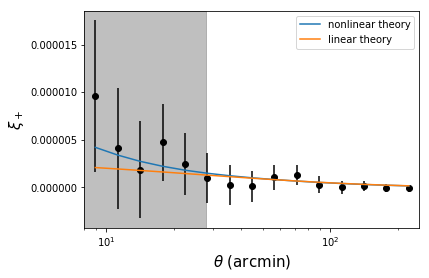

In [53]:
plt.errorbar(theta_this, dat_this, yerr=err_this, linestyle = '', marker = 'o', barsabove=True, color = 'black')
plt.semilogx(theta_this, tnl_this, label = 'nonlinear theory')
plt.semilogx(theta_this, tl_this, label = 'linear theory')
plt.axvspan(8, 28, alpha=0.5, color='grey')
plt.xlim(8,250)
plt.xscale('log')
plt.xlabel(r'$\theta$ (arcmin)', fontsize=15)
plt.ylabel(r'$\xi_+$', fontsize=15)
plt.legend(loc='upper right')
plt.show()